# Paris Olympics 2024 Data Analysis and prediction


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### loading the data

#### the data from the kaggle dataset is in the form of xlsx(excle), converting it to csv will be of much help while analysing and visualizing

In [1]:

athletes_xlsx = '/home/butterflies/Documents/test/olympics/tokyo_2021/Athletes.xlsx'
coaches_xlsx = '/home/butterflies/Documents/test/olympics/tokyo_2021/Coaches.xlsx'
gender_xlsx = '/home/butterflies/Documents/test/olympics/tokyo_2021/EntriesGender.xlsx'
medals_xlsx = '/home/butterflies/Documents/test/olympics/tokyo_2021/Medals.xlsx'
teams_xlsx = '/home/butterflies/Documents/test/olympics/tokyo_2021/Teams.xlsx'

df_athlete = pd.read_excel(athletes_xlsx)
df_coaches = pd.read_excel(coaches_xlsx)
df_gender = pd.read_excel(gender_xlsx)
df_medal = pd.read_excel(medals_xlsx)
df_teams=pd.read_excel(teams_xlsx)

athlete = '/home/butterflies/Documents/test/olympics/tokyo_2021/Athletes.csv'
coach = '/home/butterflies/Documents/test/olympics/tokyo_2021/Coaches.csv'
gender = '/home/butterflies/Documents/test/olympics/tokyo_2021/EntriesGender.csv'
medal = '/home/butterflies/Documents/test/olympics/tokyo_2021/Medals.csv'
teams = '/home/butterflies/Documents/test/olympics/tokyo_2021/Teams.csv'

df_athlete.to_csv(athlete, index=False)
df_coaches.to_csv(coach, index=False)
df_gender.to_csv(gender, index=False)
df_medal.to_csv(medal, index=False)
df_teams.to_csv(teams, index=False)



print("Conversion completed!")


Conversion completed!


/home/butterflies/Documents/test/env/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/butterflies/Documents/test/env/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Understanding the data

#### there are 5 total csvs presented to us; this section analyses each of them indivually 

In [3]:
print(f"MEDALS: {df_medal.columns}")
print(f"ATHLETES: {df_athlete.columns}")
print(f"TEAMS: {df_teams.columns}")
print(f"GENDER: {df_gender.columns}")
print(f"COACHES: {df_coaches.columns}")


MEDALS: Index(['Rank', 'Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total',
       'Rank by Total'],
      dtype='object')
ATHLETES: Index(['Name', 'NOC', 'Discipline'], dtype='object')
TEAMS: Index(['Name', 'Discipline', 'NOC', 'Event'], dtype='object')
GENDER: Index(['Discipline', 'Female', 'Male', 'Total'], dtype='object')
COACHES: Index(['Name', 'NOC', 'Discipline', 'Event'], dtype='object')


In [2]:
print(f"MEDALS: {len(df_medal)}")
print(f"ATHLETES: {len(df_athlete)}")
print(f"TEAMS: {len(df_teams)}")
print(f"GENDER: {len(df_gender)}")
print(f"COACHES: {len(df_coaches)}")


MEDALS: 93
ATHLETES: 11085
TEAMS: 743
GENDER: 46
COACHES: 394


In [5]:
#renamining teams/NOC as NOC
df_medal.rename(columns={'Team/NOC': 'NOC'}, inplace=True)


##### teams/noc is almost as similar as noc hence the renaming

### Looking into all the dataframes using pd.sample

In [6]:
df_medal.sample(10)

,Rank,NOC,Gold,Silver,Bronze,Total,Rank by Total
28,29,Belgium,3,1,3,7,33
15,16,Republic of Korea,6,4,10,20,13
12,13,New Zealand,7,6,7,20,13
54,55,Indonesia,1,1,3,5,42
64,63,Puerto Rico,1,0,0,1,77
65,66,Colombia,0,4,1,5,42
78,77,Lithuania,0,1,0,1,77
29,30,Bulgaria,3,1,2,6,39
86,86,Burkina Faso,0,0,1,1,77
46,46,Venezuela,1,3,0,4,47


In [7]:
df_athlete.sample(10)

,Name,NOC,Discipline
5459,LEMKE Max,Germany,Canoe Sprint
7900,PROKOFYEVA Yeheniya,Ukraine,Athletics
400,ANDREJCZYK Maria,Poland,Athletics
9493,TAKAHASHI Eiki,Japan,Athletics
342,AMES David,Great Britain,Hockey
10203,VENYERCSAN Bence,Hungary,Athletics
8840,SERBIN Oleh,Ukraine,Diving
5172,KUBO Takefusa,Japan,Football
341,AMDOUNI Morhad,France,Athletics
2740,ETELATALO Lassi,Finland,Athletics


In [9]:
df_coaches.sample(10)

,Name,NOC,Discipline,Event
171,HUGHLEY JR Otis,Nigeria,Basketball,Women
73,DAZA Fabian,Chile,Football,NaN
170,HUGHES Daniel,United States of America,Basketball,NaN
293,PIZZOLINI Federico,Italy,Baseball/Softball,Softball
302,RECKINGER Xavier,Germany,Hockey,Women
310,RILLIE John,Australia,Basketball,NaN
284,PARADELO David,Canada,Water Polo,Women
143,GUERRERO Rolando,Mexico,Baseball/Softball,Softball
313,ROEDL Henrik,Germany,Basketball,Men
280,OMOTO Yoji,Japan,Water Polo,Men


In [13]:
df = df_coaches.dropna(subset=['Event'])


In [10]:
df_gender.sample(10)

,Discipline,Female,Male,Total
25,Karate,40,42,82
44,Weightlifting,98,99,197
40,Trampoline Gymnastics,16,16,32
31,Sailing,175,175,350
38,Taekwondo,65,65,130
33,Skateboarding,40,40,80
4,Athletics,969,1072,2041
45,Wrestling,96,193,289
15,Cycling Road,70,131,201
6,Baseball/Softball,90,144,234


In [12]:
df_teams.sample(10)

,Name,Discipline,NOC,Event
414,France,Football,France,Men
378,Italy,Fencing,Italy,Women's Sabre Team
477,South Africa,Hockey,South Africa,Women
153,Germany,Athletics,Germany,Women's 4 x 100m Relay
141,Czech Republic,Athletics,Czech Republic,Men's 4 x 400m Relay
370,Hungary,Fencing,Hungary,Women's Foil Team
124,United States,Artistic Swimming,United States of America,Duet
521,Australia,Swimming,Australia,Mixed 4 x 100m Medley Relay
330,Netherlands,Cycling Track,Netherlands,Men's Team Sprint
214,United States,Baseball/Softball,United States of America,Baseball


### Analysing medals dataframe
 this section visuzlises medals dataframe , we first look at the distribution of medals across countries for countries with more than 10 medals,then to analyze rank and rank by total and their difference we visualize them according to gold,silver and bronze medals 

In [14]:
medal_count = df_medal.drop(columns=["Rank by Total",'Rank'])
medal_count



,NOC,Gold,Silver,Bronze,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71
...,...,...,...,...,...
88,Ghana,0,0,1,1
89,Grenada,0,0,1,1
90,Kuwait,0,0,1,1
91,Republic of Moldova,0,0,1,1


In [15]:
countries_with_few_medals = medal_count[medal_count['Total'] < 11]
countries_with_few_medals

,NOC,Gold,Silver,Bronze,Total
18,Kenya,4,4,2,10
19,Norway,4,2,2,8
20,Jamaica,4,1,4,9
22,Sweden,3,6,0,9
25,Croatia,3,3,2,8
...,...,...,...,...,...
88,Ghana,0,0,1,1
89,Grenada,0,0,1,1
90,Kuwait,0,0,1,1
91,Republic of Moldova,0,0,1,1


In [16]:
countries_with_more_medals = medal_count[medal_count['Total'] > 11]
countries_with_more_medals

,NOC,Gold,Silver,Bronze,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71
5,Australia,17,7,22,46
6,Netherlands,10,12,14,36
7,France,10,12,11,33
8,Germany,10,11,16,37
9,Italy,10,10,20,40


In [29]:
# Sort the medal_df by Rank and Rank by Total to compare
print(df_medal[['NOC', 'Rank', 'Rank by Total']].sort_values(by=['Rank', 'Rank by Total']))


                           NOC  Rank  Rank by Total
0     United States of America     1              1
1   People's Republic of China     2              2
2                        Japan     3              5
3                Great Britain     4              4
4                          ROC     5              3
..                         ...   ...            ...
88                       Ghana    86             77
89                     Grenada    86             77
90                      Kuwait    86             77
91         Republic of Moldova    86             77
92        Syrian Arab Republic    86             77

[93 rows x 3 columns]


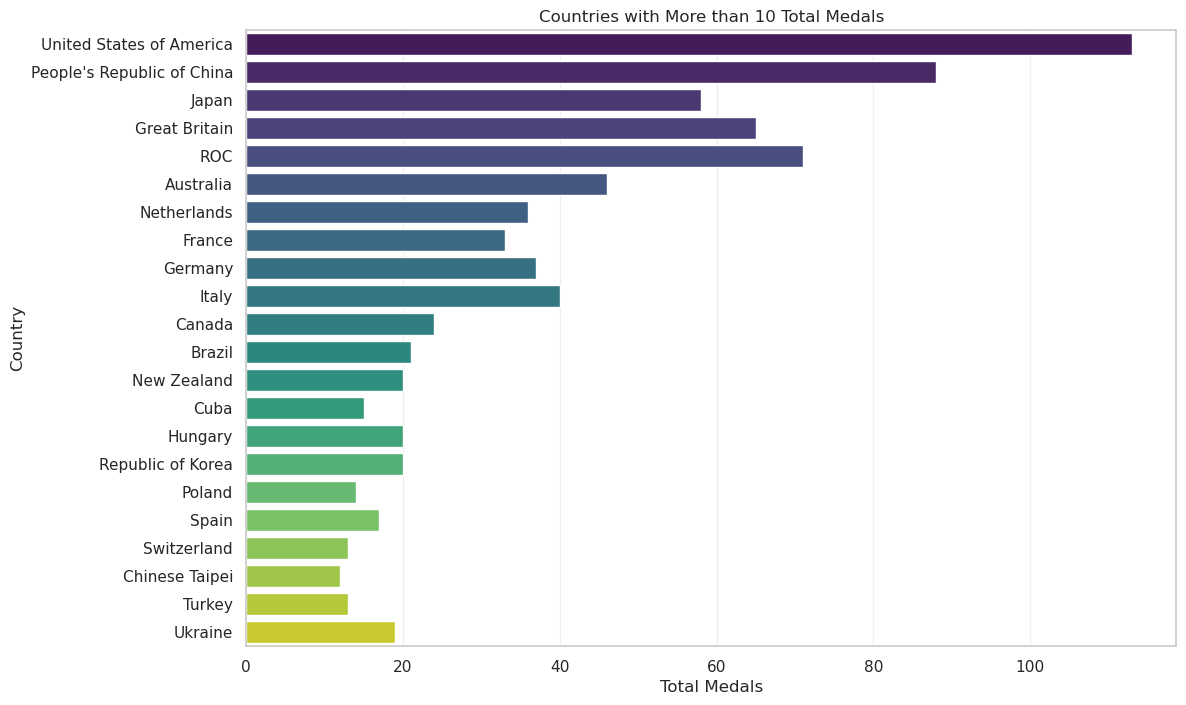

In [139]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='NOC', data=countries_with_more_medals, hue='NOC', palette='viridis', dodge=False, legend=False)

plt.title('Countries with More than 10 Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Country')

plt.show();

/tmp/ipykernel_80325/1133369191.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gold', y='NOC', data=countries_with_more_medals, palette='YlOrBr')


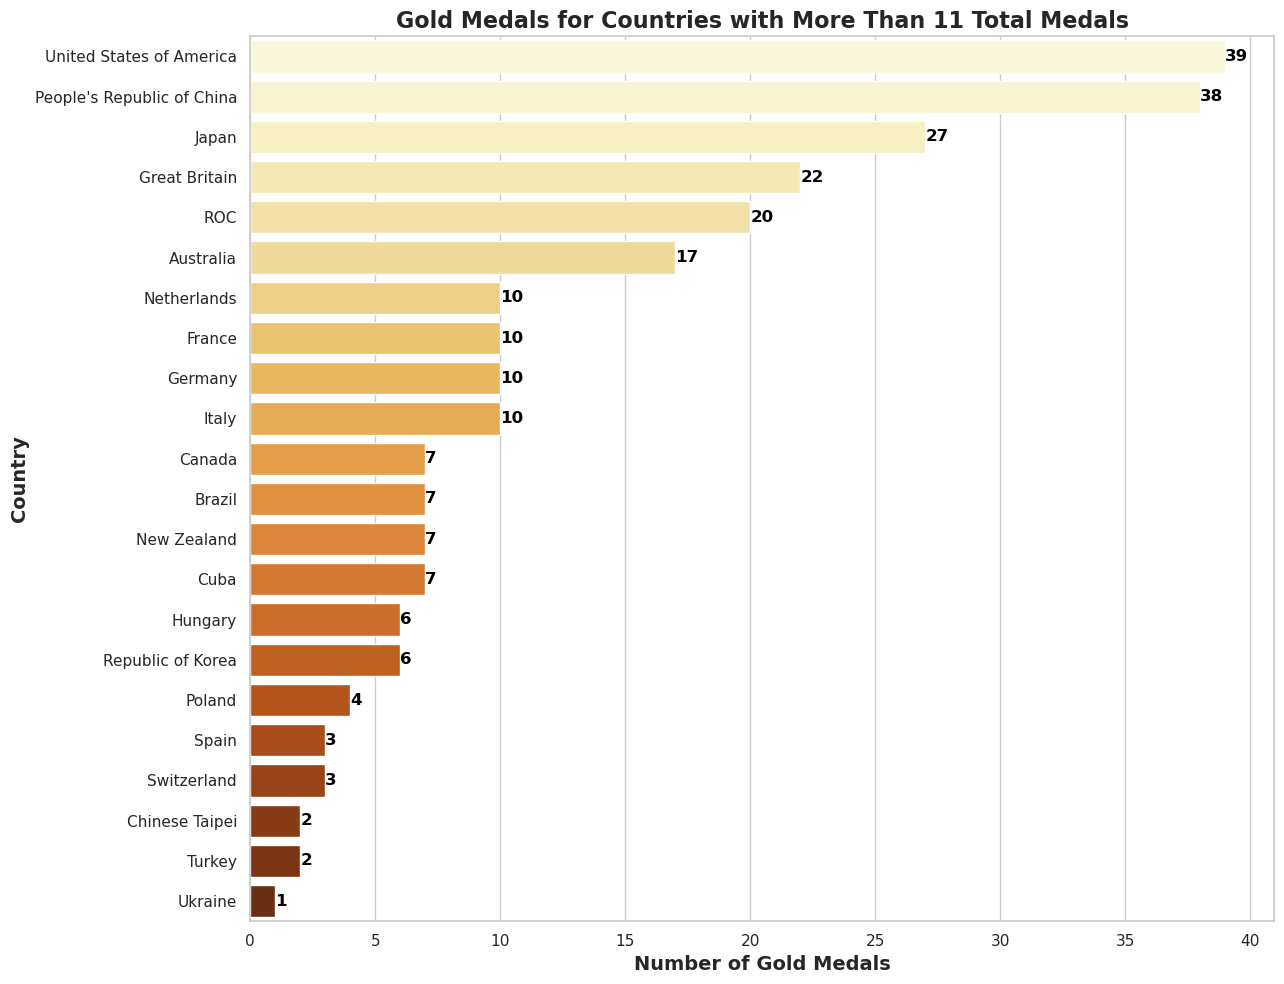

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(13,10))
sns.barplot(x='Gold', y='NOC', data=countries_with_more_medals, palette='YlOrBr')

plt.title('Gold Medals for Countries with More Than 11 Total Medals', fontsize=16, fontweight='bold')
plt.xlabel('Number of Gold Medals', fontsize=14, fontweight='bold')
plt.ylabel('Country', fontsize=14, fontweight='bold')

for index, value in enumerate(countries_with_more_medals['Gold']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()

plt.show()


##### Canada,Brazil,New zealand and cuba each posses 7 gold medals,yet they dont have the same rank, hence we visuzlize gold,silver and bronze

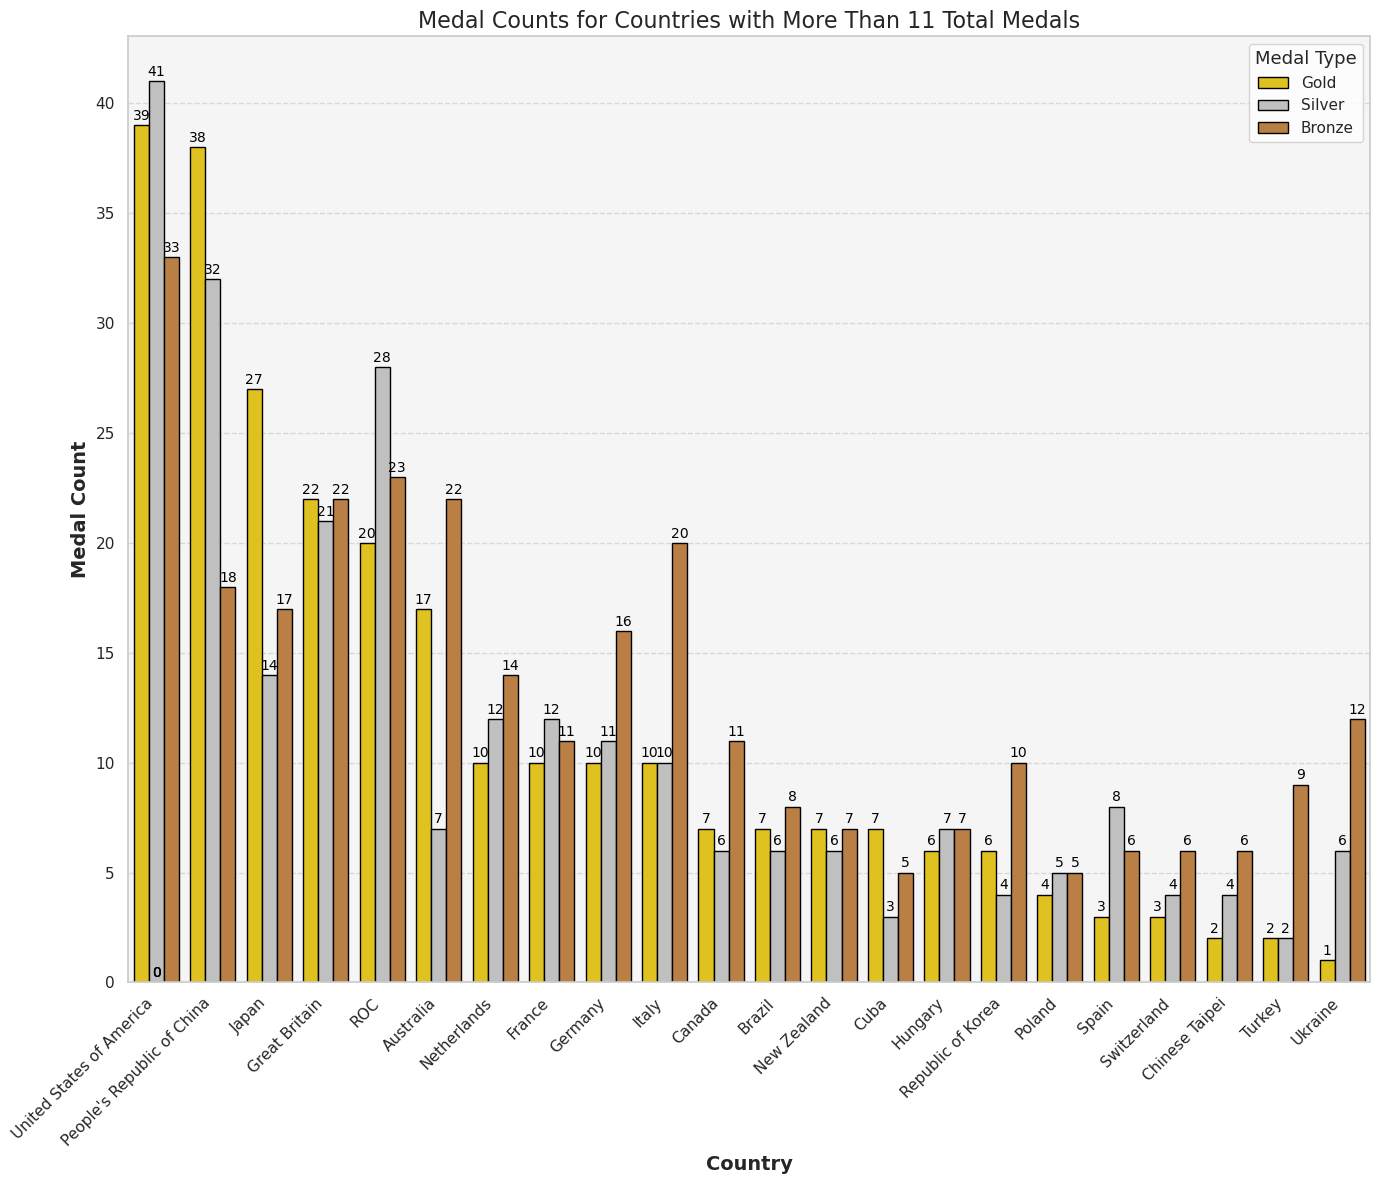

In [27]:
plt.figure(figsize=(14, 12))
melted_medals = pd.melt(countries_with_more_medals, id_vars=['NOC'], value_vars=['Gold', 'Silver', 'Bronze'],
                        var_name='Medal', value_name='Count')
palette={'Gold': '#FFD700', 'Silver': 'silver', 'Bronze': '#cd7f32'}

ax = sns.barplot(x='NOC', y='Count', hue='Medal', data=melted_medals, palette=palette, edgecolor='black')

# Add titles and labels
plt.title('Medal Counts for Countries with More Than 11 Total Medals', fontsize=16)
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Medal Count', fontsize=14, fontweight='bold')

# Add value annotations on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.1, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust legend
plt.legend(title='Medal Type', title_fontsize='13', fontsize='11')

# Adjust background color
plt.gca().set_facecolor('#f5f5f5')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


##### this graph gives us a clear picture of coutries and their rank.

### Analysing the gender csv
this section helps us to uderstand the gender ration in several games/discipline

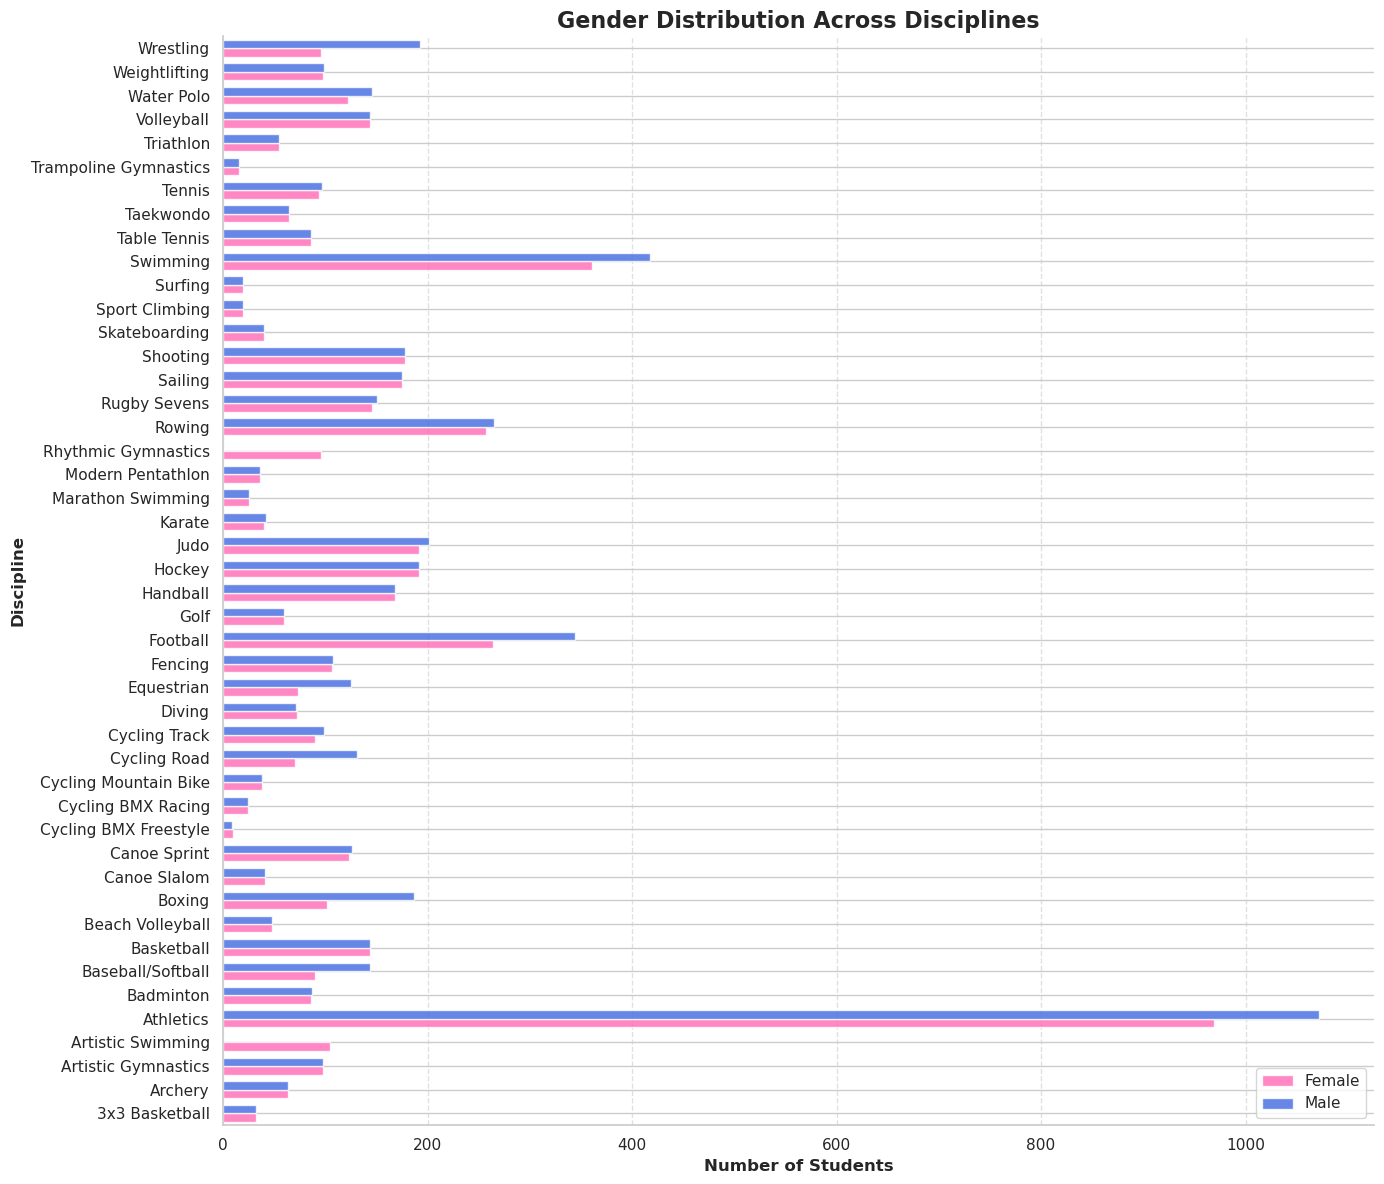

In [32]:
disciplines = df_gender['Discipline']
females = df_gender['Female']
males = df_gender['Male']

fig, ax = plt.subplots(figsize=(14, 12))  # Increased figure size to accommodate spacing

bar_height = 0.5
group_height = 2 * bar_height + 0.4  # Total height for each discipline group
y = np.arange(len(disciplines)) * group_height

ax.barh(y - bar_height/2, females, bar_height, label='Female', color='#FF69B4', alpha=0.8)
ax.barh(y + bar_height/2, males, bar_height, label='Male', color='#4169E1', alpha=0.8)

ax.set_ylabel('Discipline', fontsize=12, fontweight='bold')
ax.set_xlabel('Number of Students', fontsize=12, fontweight='bold')
ax.set_title('Gender Distribution Across Disciplines', fontsize=16, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(disciplines)


ax.legend(loc='lower right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='x', linestyle='--', alpha=0.6)

ax.set_ylim(y.min() - group_height/2, y.max() + group_height/2)

plt.tight_layout()
plt.show()



Overall gender distribution:
Female: 48.00%
Male: 52.00%

Discipline with highest female representation: Artistic Swimming
Female: 100.00%, Male: 0.00%

Discipline with lowest female representation: Wrestling
Female: 33.22%, Male: 66.78%


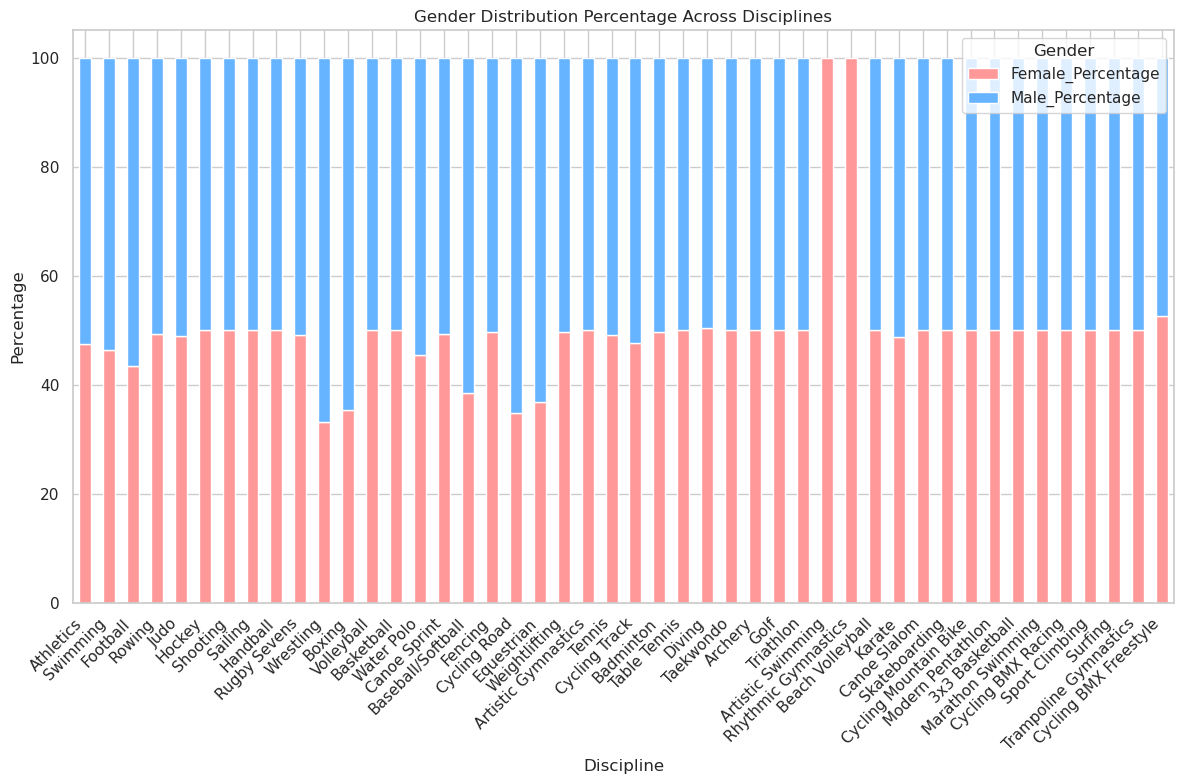

In [33]:
import matplotlib.pyplot as plt

df_gender['Total'] = df_gender['Female'] + df_gender['Male']
df_gender['Female_Percentage'] = df_gender['Female'] / df_gender['Total'] * 100
df_gender['Male_Percentage'] = df_gender['Male'] / df_gender['Total'] * 100

# 2. Sort disciplines by total number of students
df_sorted = df_gender.sort_values('Total', ascending=False)

# 3. Calculate overall gender ratio
overall_female = df_gender['Female'].sum()
overall_male = df_gender['Male'].sum()
overall_total = overall_female + overall_male

print(f"Overall gender distribution:")
print(f"Female: {overall_female / overall_total:.2%}")
print(f"Male: {overall_male / overall_total:.2%}")

# 4. Identify disciplines with highest and lowest female representation
highest_female = df_gender.loc[df_gender['Female_Percentage'].idxmax()]
lowest_female = df_gender.loc[df_gender['Female_Percentage'].idxmin()]

print(f"\nDiscipline with highest female representation: {highest_female['Discipline']}")
print(f"Female: {highest_female['Female_Percentage']:.2f}%, Male: {highest_female['Male_Percentage']:.2f}%")

print(f"\nDiscipline with lowest female representation: {lowest_female['Discipline']}")
print(f"Female: {lowest_female['Female_Percentage']:.2f}%, Male: {lowest_female['Male_Percentage']:.2f}%")

# 5. Visualizations

# 5.1 Stacked percentage bar chart with custom colors
plt.figure(figsize=(12, 8))
df_sorted.plot(x='Discipline', y=['Female_Percentage', 'Male_Percentage'], 
               kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=plt.gca())
plt.title('Gender Distribution Percentage Across Disciplines')
plt.xlabel('Discipline')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Analysing the athlete dataframe


since both athletes and teams have NOC and discipline they are combined to form 2 new dataframes

In [34]:
#athletes and teams have discpline and noc
athlete_grouped = df_athlete.groupby('NOC').size().reset_index(name='no.of Athletes')
athlete_grouped_by_discipline = df_athlete.groupby('Discipline').size().reset_index(name='#Discipline')

# Display the grouped DataFrame
print(athlete_grouped)
print(athlete_grouped_by_discipline)


                         NOC  no.of Athletes
0                Afghanistan               5
1                    Albania               8
2                    Algeria              41
3             American Samoa               5
4                    Andorra               2
..                       ...             ...
201  Virgin Islands, British               3
202       Virgin Islands, US               4
203                    Yemen               3
204                   Zambia              29
205                 Zimbabwe               5

[206 rows x 2 columns]
               Discipline  #Discipline
0          3x3 Basketball           62
1                 Archery          122
2     Artistic Gymnastics          187
3       Artistic Swimming           98
4               Athletics         2068
5               Badminton          164
6       Baseball/Softball          220
7              Basketball          280
8        Beach Volleyball           90
9                  Boxing          270
10     

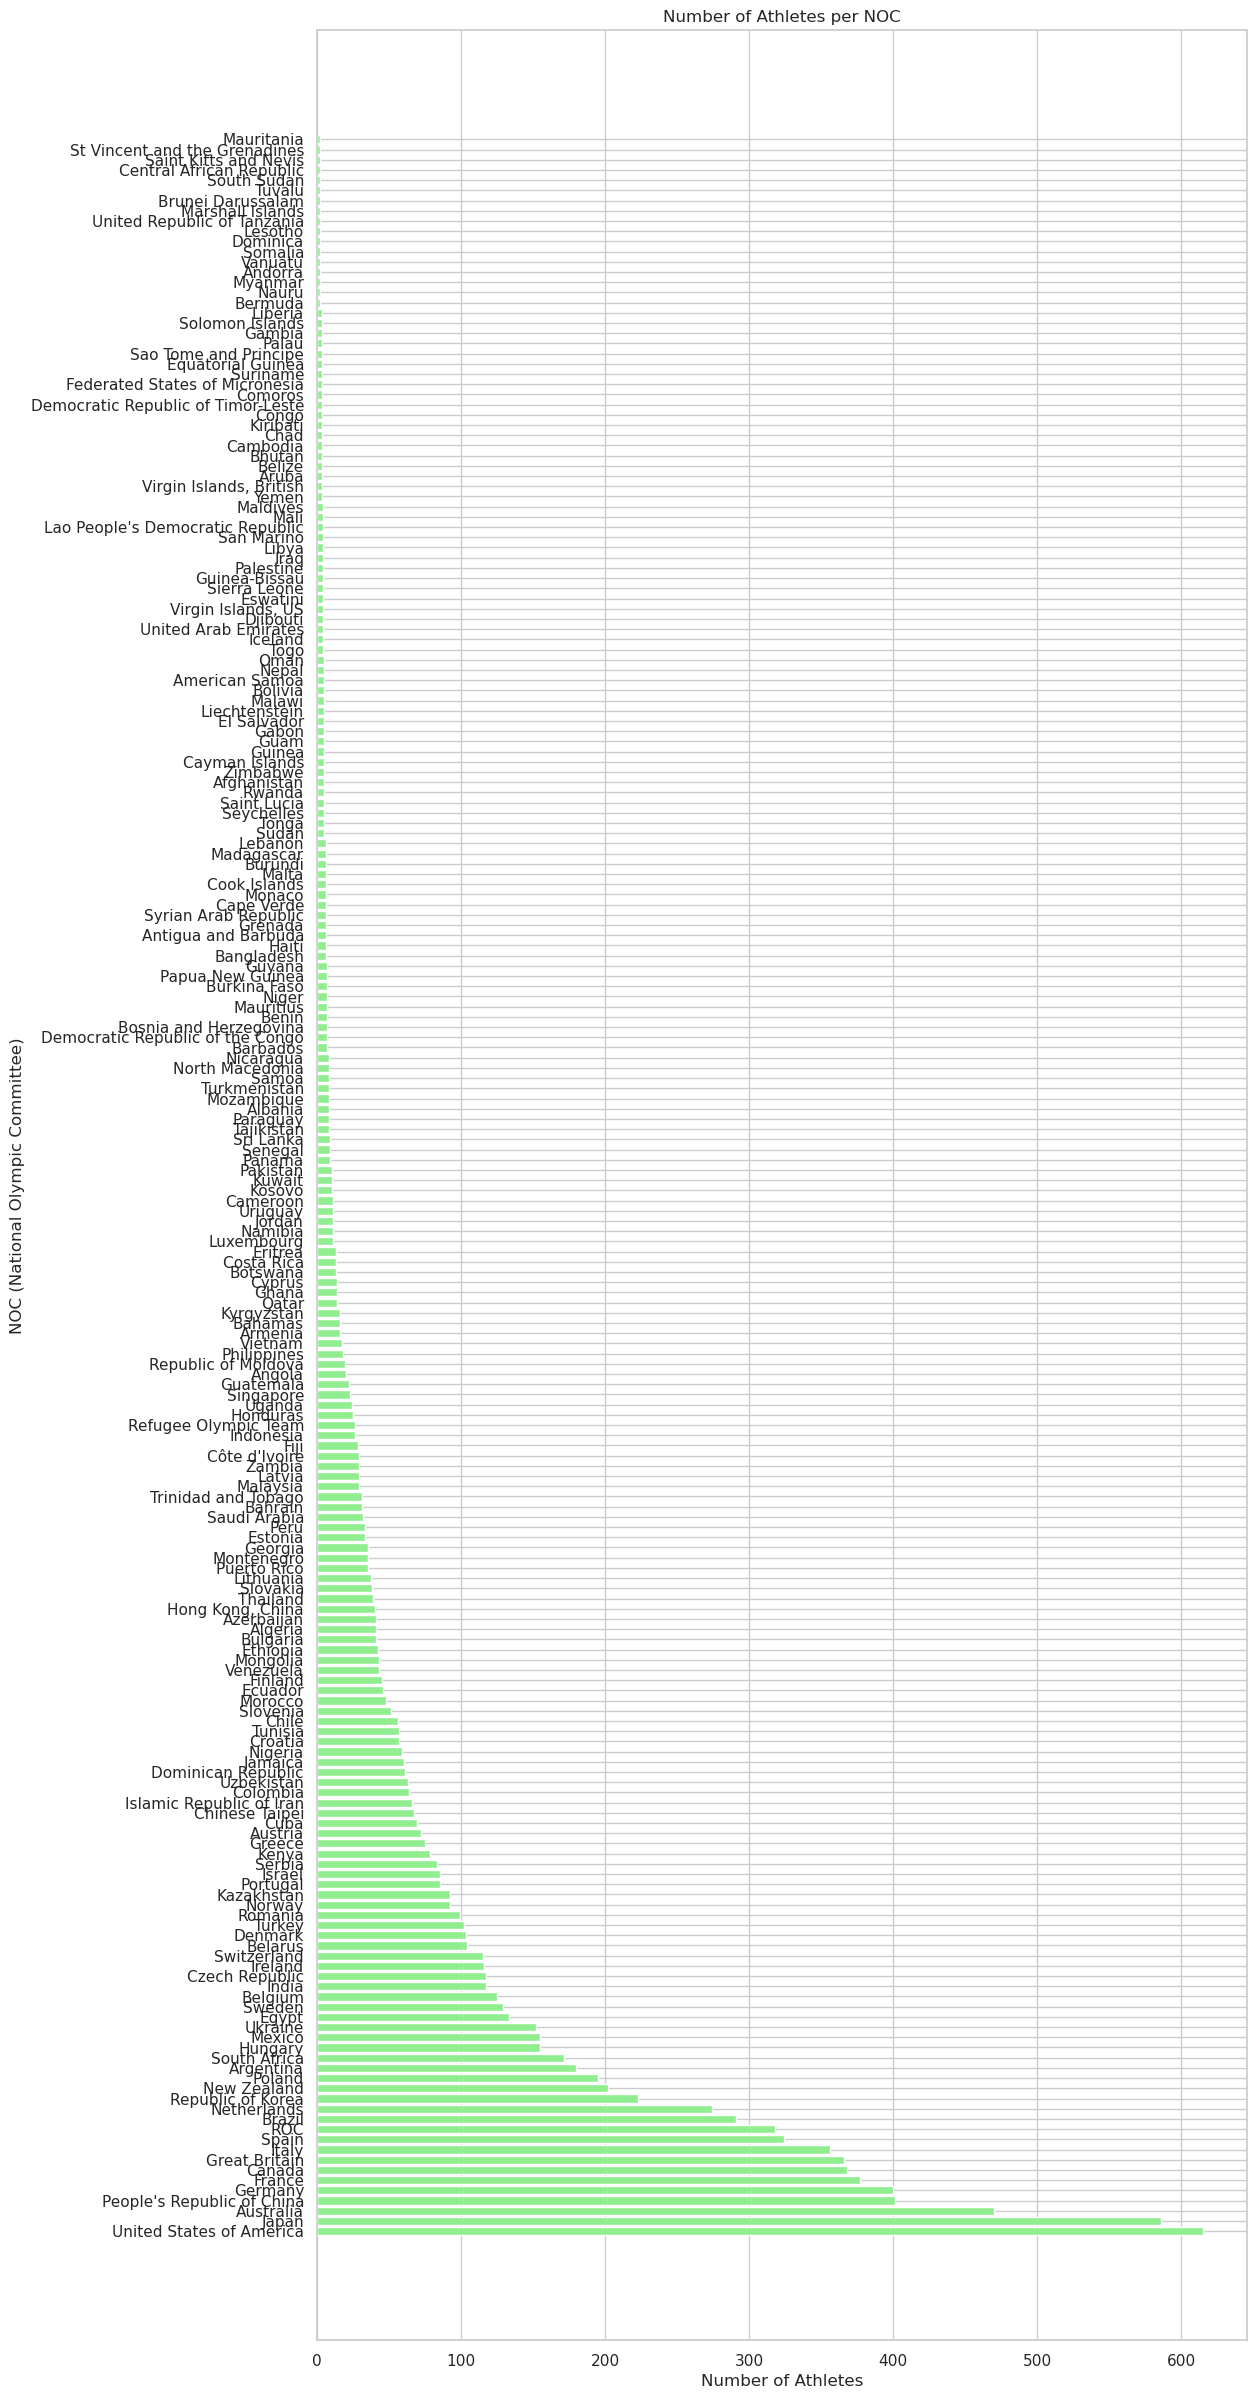

In [36]:
import matplotlib.pyplot as plt

athlete_grouped_sorted = athlete_grouped.sort_values(by='no.of Athletes', ascending=False)

plt.figure(figsize=(12, 30))  
plt.barh(athlete_grouped_sorted['NOC'], athlete_grouped_sorted['no.of Athletes'], color='lightgreen')
plt.xlabel('Number of Athletes')
plt.ylabel('NOC (National Olympic Committee)')
plt.title('Number of Athletes per NOC')
plt.show()


this plot is way too much to analyze; hence we can look into nocs with more than 50 athletes

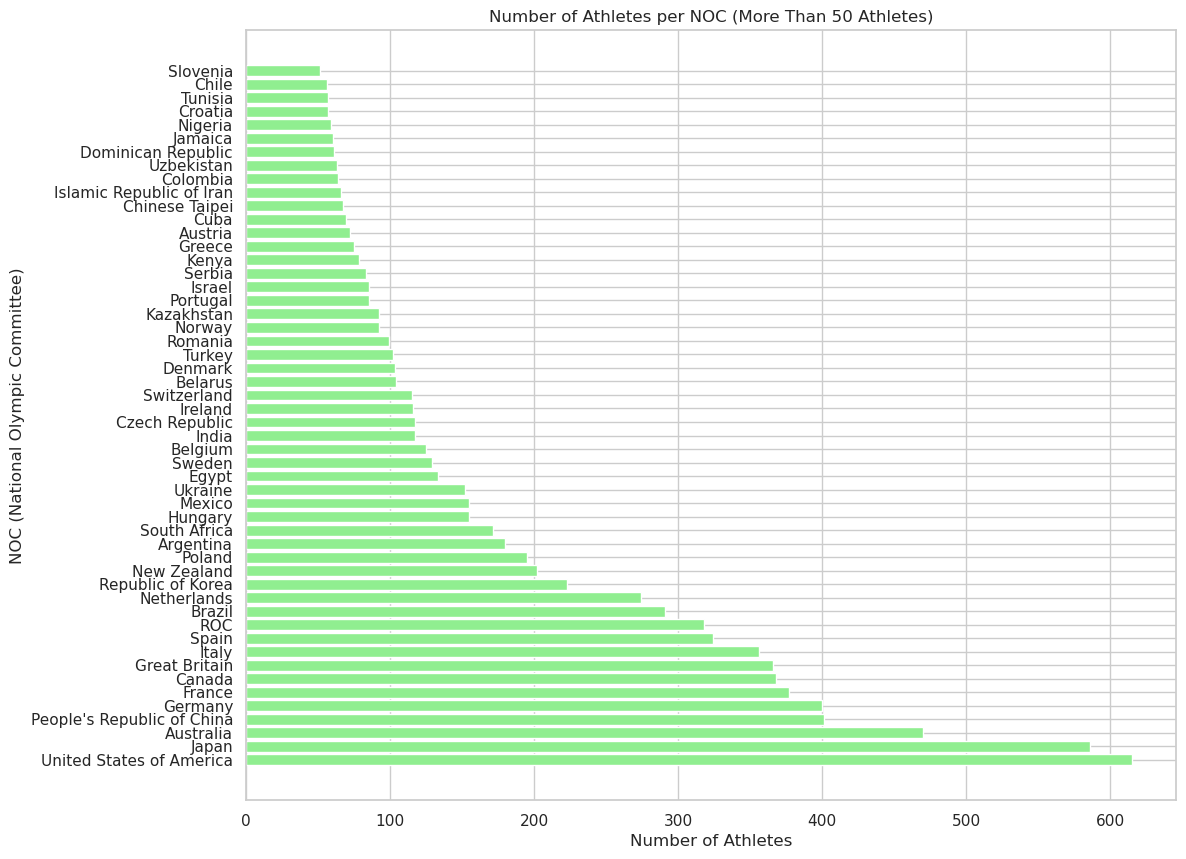

In [37]:
athlete_grouped_sorted = athlete_grouped.sort_values(by='no.of Athletes', ascending=False)

athlete_grouped_filtered = athlete_grouped_sorted[athlete_grouped_sorted['no.of Athletes'] > 50]

plt.figure(figsize=(12, 10))  
plt.barh(athlete_grouped_filtered['NOC'], athlete_grouped_filtered['no.of Athletes'], color='lightgreen')
plt.xlabel('Number of Athletes')
plt.ylabel('NOC (National Olympic Committee)')
plt.title('Number of Athletes per NOC (More Than 50 Athletes)')
plt.show()


 Group by NOC and count the number of teams per NOC


In [38]:
teams_grouped = df_teams.groupby('NOC').size().reset_index(name='#Teams')
teams_grouped_by_discipline = df_teams.groupby('Discipline').size().reset_index(name='#Teams')
print(teams_grouped)
print(teams_grouped_by_discipline)


                         NOC  #Teams
0                     Angola       1
1                  Argentina      10
2                  Australia      35
3                    Austria       5
4                 Azerbaijan       1
..                       ...     ...
79  United States of America      47
80                Uzbekistan       1
81                 Venezuela       1
82                   Vietnam       1
83                    Zambia       1

[84 rows x 2 columns]
             Discipline  #Teams
0        3x3 Basketball      16
1               Archery      53
2   Artistic Gymnastics      24
3     Artistic Swimming      32
4             Athletics      79
5     Baseball/Softball      12
6            Basketball      24
7      Beach Volleyball      48
8         Cycling Track      64
9               Fencing      52
10             Football      28
11             Handball      24
12               Hockey      24
13  Rhythmic Gymnastics      14
14         Rugby Sevens      24
15             Swimmi

In [40]:
athlete_noc_groups = df_athlete.groupby('NOC').size()
teams_noc_groups = df_teams.groupby('NOC').size()
medal_noc_groups = df_medal.groupby('NOC').size()

print(athlete_noc_groups,"done",teams_noc_groups,"done",medal_noc_groups)


NOC
Afghanistan                 5
Albania                     8
Algeria                    41
American Samoa              5
Andorra                     2
                           ..
Virgin Islands, British     3
Virgin Islands, US          4
Yemen                       3
Zambia                     29
Zimbabwe                    5
Length: 206, dtype: int64 done NOC
Angola                       1
Argentina                   10
Australia                   35
Austria                      5
Azerbaijan                   1
                            ..
United States of America    47
Uzbekistan                   1
Venezuela                    1
Vietnam                      1
Zambia                       1
Length: 84, dtype: int64 done NOC
Argentina                   1
Armenia                     1
Australia                   1
Austria                     1
Azerbaijan                  1
                           ..
Uganda                      1
Ukraine                     1
United States of

to check of noc in ahtlete df and noc in the medal df match

In [42]:
noc_list = athlete_grouped_filtered['NOC'].tolist()

medal_noc_list = df_medal['NOC'].tolist()


set_athlete = set(noc_list)
set_medal = set(medal_noc_list)

intersection = set_athlete.intersection(set_medal)
print(f"len of intersection: {len(intersection)}")





len of intersection: 51


In [43]:
athlete_grouped_filtered.head()

,NOC,no.of Athletes
195,United States of America,615
94,Japan,586
10,Australia,470
144,People's Republic of China,401
71,Germany,400


In [45]:
merged_athlete_medal = pd.merge(athlete_grouped_filtered, df_medal, on='NOC')


In [48]:
merged_athlete_medal.describe()


,no.of Athletes,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,179.901961,31.058824,6.117647,5.921569,7.039216,19.078431,27.274510
std,142.867247,22.341362,8.746764,8.248256,7.315629,23.280759,17.409283
min,51.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,76.500000,13.500000,1.000000,1.000000,2.000000,5.000000,13.000000
50%,117.000000,26.000000,3.000000,3.000000,4.000000,9.000000,26.000000
75%,248.500000,45.500000,7.000000,6.000000,9.500000,20.000000,42.000000
max,615.000000,84.000000,39.000000,41.000000,33.000000,113.000000,66.000000


visuzlize total medals per NOC

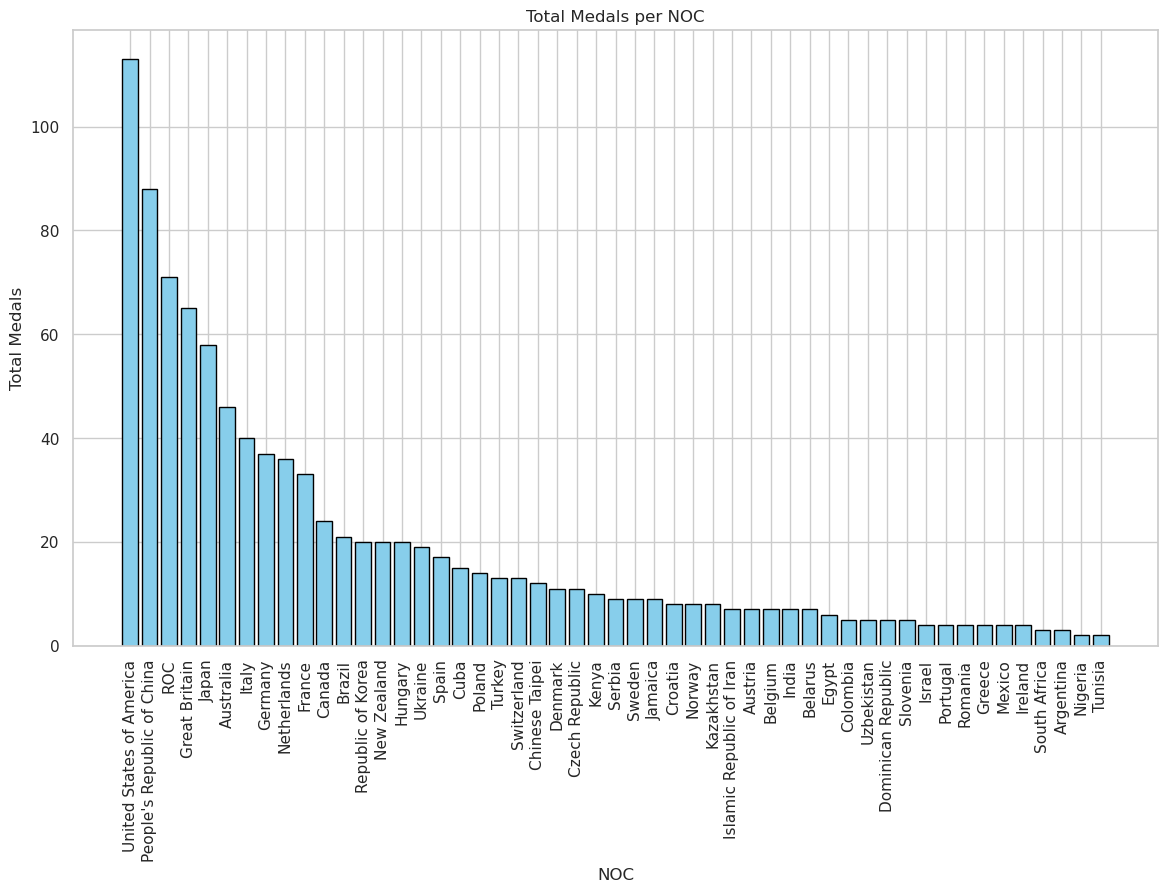

In [63]:
sorted_df = merged_athlete_medal.sort_values(by='Total', ascending=False)

# Bar plot for Total Medals per NOC
plt.figure(figsize=(14, 8))
plt.bar(sorted_df['NOC'], sorted_df['Total'], color='skyblue',edgecolor='black')
plt.xlabel('NOC')
plt.ylabel('Total Medals')
plt.title('Total Medals per NOC')
plt.xticks(rotation=90)
plt.show()


Bubble graph to look at the correlation between the number of participants and number of medals 

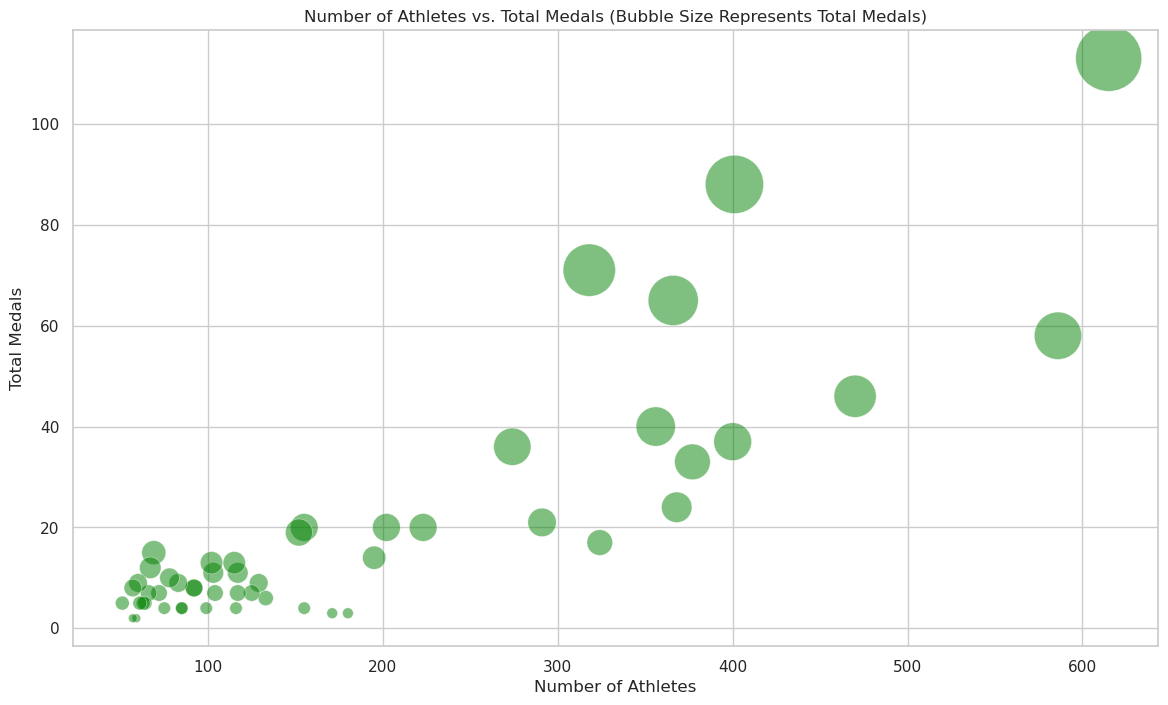

In [47]:
plt.figure(figsize=(14, 8))
plt.scatter(merged_athlete_medal['no.of Athletes'], merged_athlete_medal['Total'], 
            s=merged_athlete_medal['Total']*20, alpha=0.5, color='green', edgecolors='w', linewidth=0.5)
plt.xlabel('Number of Athletes')
plt.ylabel('Total Medals')
plt.title('Number of Athletes vs. Total Medals (Bubble Size Represents Total Medals)')
plt.grid(True)
plt.show()


seperate visualization of gold,silver and bronze

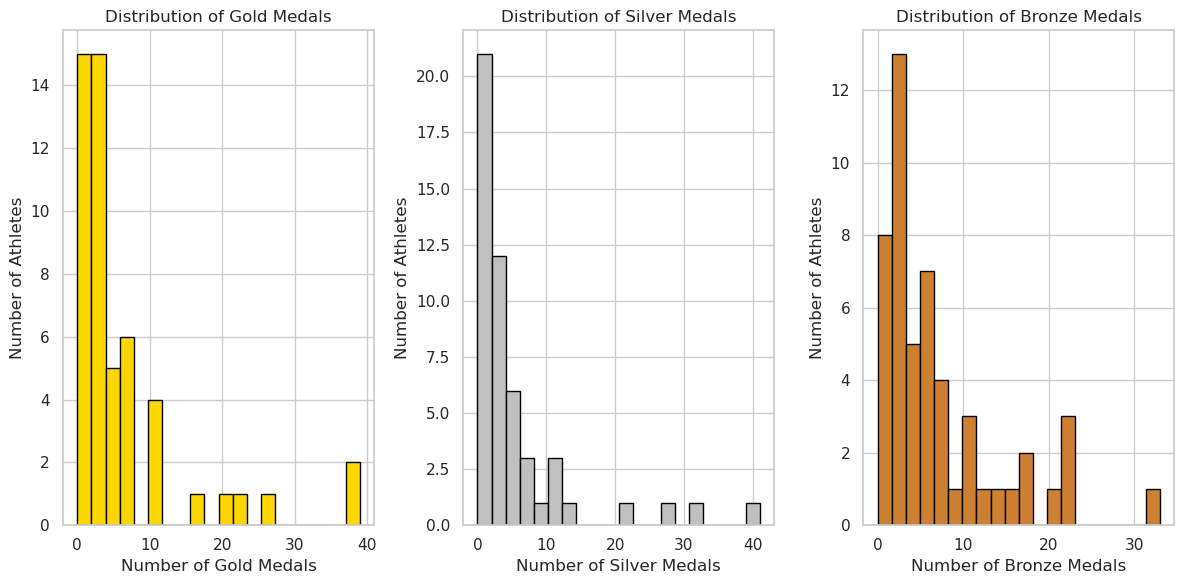

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(merged_athlete_medal['Gold'], bins=20, color='gold', edgecolor='black')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Gold Medals')

plt.subplot(1, 3, 2)
plt.hist(merged_athlete_medal['Silver'], bins=20, color='silver', edgecolor='black')
plt.xlabel('Number of Silver Medals')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Silver Medals')

plt.subplot(1, 3, 3)
plt.hist(merged_athlete_medal['Bronze'], bins=20, color='#cd7f32', edgecolor='black')
plt.xlabel('Number of Bronze Medals')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Bronze Medals')

plt.tight_layout()
plt.show()


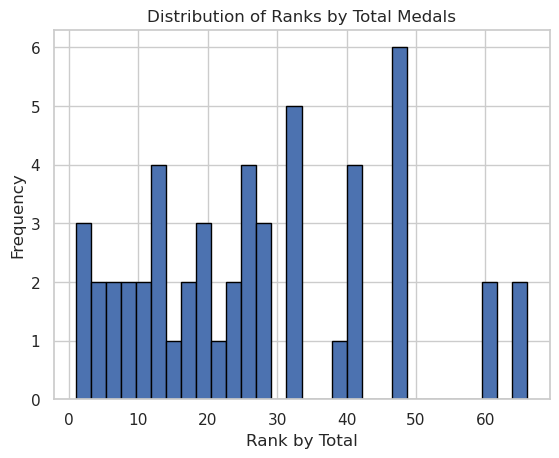

In [50]:
plt.hist(merged_athlete_medal['Rank by Total'], bins=30, edgecolor='black')
plt.xlabel('Rank by Total')
plt.ylabel('Frequency')
plt.title('Distribution of Ranks by Total Medals')
plt.show()




In [51]:
merged_athlete_medal['Medals per Athlete'] = merged_athlete_medal[['Gold', 'Silver', 'Bronze']].sum(axis=1) / merged_athlete_medal['no.of Athletes']
efficient_countries = merged_athlete_medal[['NOC', 'Medals per Athlete']].sort_values(by='Medals per Athlete', ascending=False)
print(efficient_countries.head(10))


                           NOC  Medals per Athlete
10                         ROC            0.223270
3   People's Republic of China            0.219451
40                        Cuba            0.217391
0     United States of America            0.183740
41              Chinese Taipei            0.179104
7                Great Britain            0.177596
46                     Jamaica            0.150000
48                     Croatia            0.140351
12                 Netherlands            0.131387
18                     Hungary            0.129032


correlation matrix

In [52]:
correlation_matrix = merged_athlete_medal[['Gold', 'Silver', 'Bronze', 'Total', 'Rank by Total']].corr()
print(correlation_matrix)


                   Gold    Silver    Bronze     Total  Rank by Total
Gold           1.000000  0.925205  0.846334  0.969451      -0.661258
Silver         0.925205  1.000000  0.846240  0.967820      -0.649307
Bronze         0.846334  0.846240  1.000000  0.932028      -0.775684
Total          0.969451  0.967820  0.932028  1.000000      -0.722233
Rank by Total -0.661258 -0.649307 -0.775684 -0.722233       1.000000


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

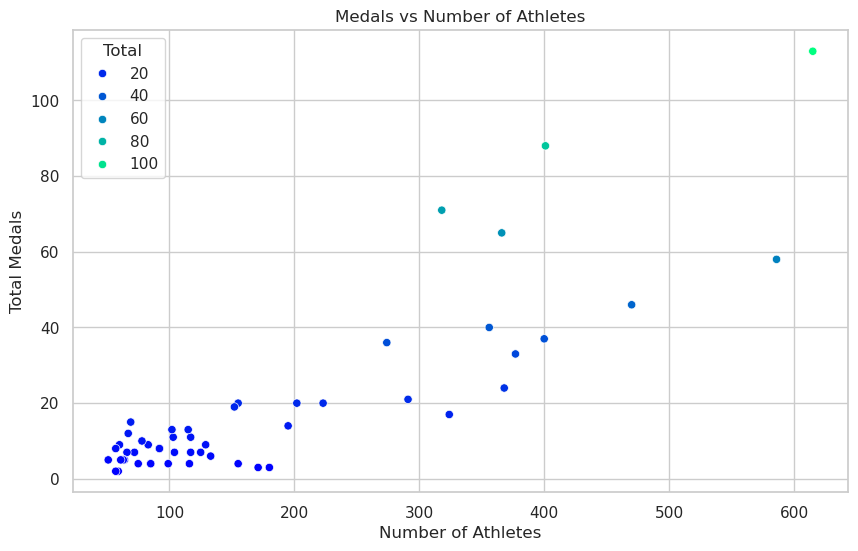

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_athlete_medal, x='no.of Athletes', y='Total', hue='Total', palette='winter')
plt.xlabel('Number of Athletes')
plt.ylabel('Total Medals')
plt.title('Medals vs Number of Athletes')
plt.colorbar(label='Total Medals')
plt.show()


### Analysing Teams dataframe


the teams dataframe has an unnececory column called name

In [54]:
df_teams = df_teams.drop("Name",axis=1)

In [55]:
teams_per_discipline = df_teams['Discipline'].value_counts()

print("Number of teams per discipline:")
print(teams_per_discipline)


Number of teams per discipline:
Discipline
Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Beach Volleyball        48
Table Tennis            48
Artistic Swimming       32
Football                28
Artistic Gymnastics     24
Volleyball              24
Basketball              24
Handball                24
Hockey                  24
Rugby Sevens            24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: count, dtype: int64


In [56]:
# Count the number of teams per NOC
teams_per_noc = df_teams['NOC'].value_counts()

print("Number of teams per NOC:")
print(teams_per_noc)


Number of teams per NOC:
NOC
Japan                       48
United States of America    47
Italy                       37
Germany                     36
Australia                   35
                            ..
Vietnam                      1
Republic of Moldova          1
Malaysia                     1
Bangladesh                   1
Venezuela                    1
Name: count, Length: 84, dtype: int64


count the number of unique NOCs per discipline


In [57]:
nocs_per_discipline = df_teams.groupby('Discipline')['NOC'].nunique()

print("Number of NOCs per discipline:")
print(nocs_per_discipline)


Number of NOCs per discipline:
Discipline
3x3 Basketball         13
Archery                31
Artistic Gymnastics    17
Artistic Swimming      22
Athletics              33
Baseball/Softball       9
Basketball             18
Beach Volleyball       23
Cycling Track          23
Fencing                18
Football               24
Handball               18
Hockey                 14
Rhythmic Gymnastics    14
Rugby Sevens           16
Swimming               30
Table Tennis           25
Triathlon              18
Volleyball             18
Water Polo             16
Name: NOC, dtype: int64


 Count the number of unique disciplines per NOC


In [58]:
disciplines_per_noc = df_teams.groupby('NOC')['Discipline'].nunique()

print("Number of disciplines per NOC:")
print(disciplines_per_noc)


Number of disciplines per NOC:
NOC
Angola                       1
Argentina                    7
Australia                   15
Austria                      4
Azerbaijan                   1
                            ..
United States of America    18
Uzbekistan                   1
Venezuela                    1
Vietnam                      1
Zambia                       1
Name: Discipline, Length: 84, dtype: int64


number of teams per discipline

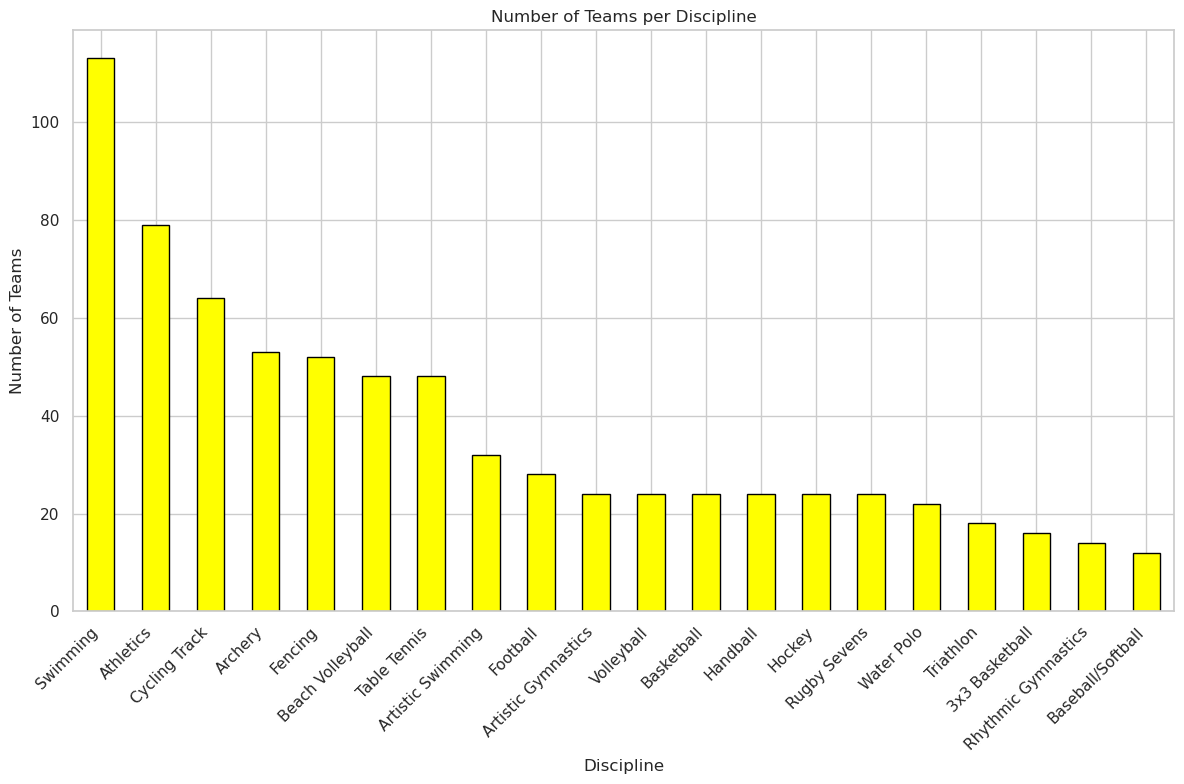

In [61]:
import matplotlib.pyplot as plt

teams_per_discipline.plot(kind='bar', figsize=(12, 8), color='yellow',edgecolor='black')
plt.title('Number of Teams per Discipline')
plt.xlabel('Discipline')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


number of nocs per discipline

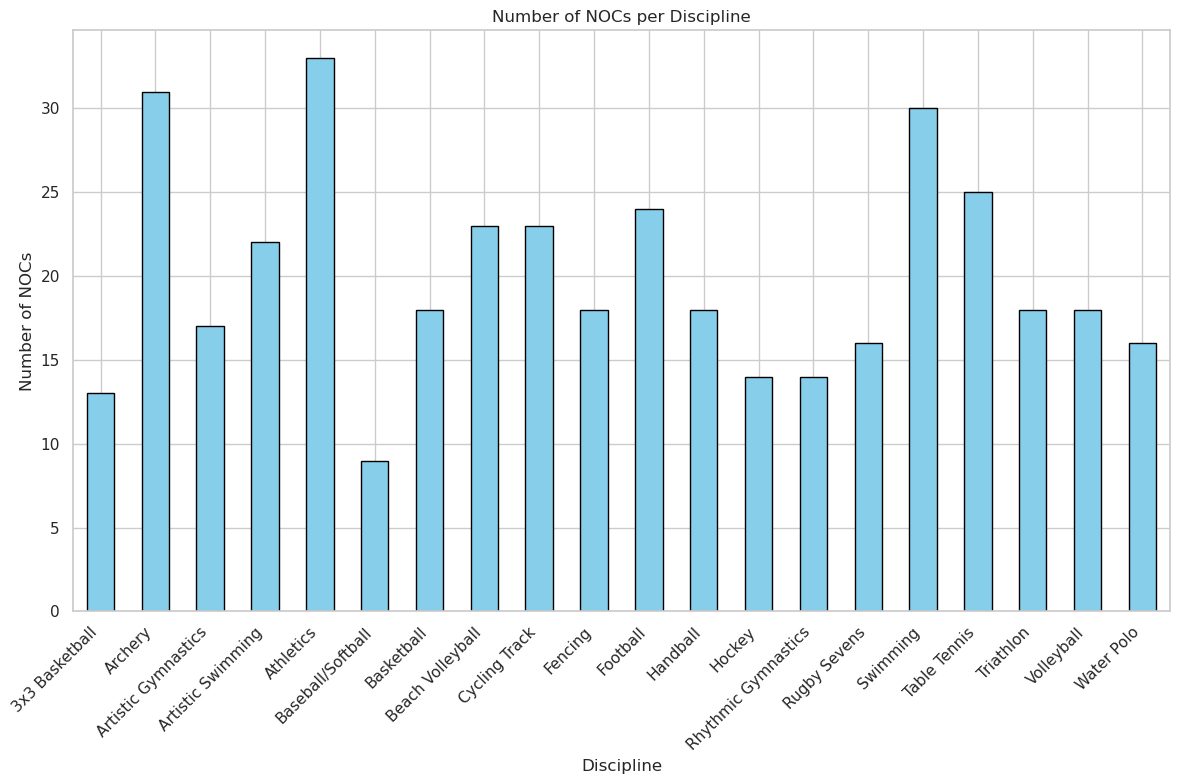

In [62]:
# Plot the number of NOCs per discipline
nocs_per_discipline.plot(kind='bar', figsize=(12, 8), color='skyblue',edgecolor='black')
plt.title('Number of NOCs per Discipline')
plt.xlabel('Discipline')
plt.ylabel('Number of NOCs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Model prediciton

importing all libraries

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline  
from sklearn.metrics import mean_squared_error, r2_score


merging the athlete and noc ; this will be our final dataframe used for prediction \
features i will be considering:Gold', 'Silver', 'Bronze', 'Total', 'Rank', 'Rank by Total\
output(prediction): total


In [70]:
df_athlete_sorted = df_athlete.sort_values('NOC')
df_athlete_sorted
noc_counts = df_athlete_sorted['NOC'].value_counts().reset_index()
noc_counts.columns = ['NOC', 'total_athletes']


In [71]:
df_combined = pd.merge(noc_counts, df_medal, on='NOC', how='outer')
df_combined = df_combined.sort_values('total_athletes', ascending=False)
columns_to_fill = ['Gold', 'Silver', 'Bronze', 'Total', 'Rank', 'Rank by Total']
df_combined[columns_to_fill] = df_combined[columns_to_fill].fillna(0)
df_combined[columns_to_fill] = df_combined[columns_to_fill].astype(int)



final dataframe

In [73]:
df_combined

,NOC,total_athletes,Rank,Gold,Silver,Bronze,Total,Rank by Total
195,United States of America,615,1,39,41,33,113,1
94,Japan,586,3,27,14,17,58,5
10,Australia,470,6,17,7,22,46,6
144,People's Republic of China,401,2,38,32,18,88,2
71,Germany,400,9,10,11,16,37,8
...,...,...,...,...,...,...,...,...
173,South Sudan,2,0,0,0,0,0,0
36,Central African Republic,2,0,0,0,0,0,0
157,Saint Kitts and Nevis,2,0,0,0,0,0,0
176,St Vincent and the Grenadines,2,0,0,0,0,0,0


X=>features/input variables, y=> output variable

In [89]:
X = df_combined[['total_athletes', 'Rank', 'Rank by Total']]
y = df_combined['Total']  # Total medals as the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


standard scaling to transform all features and make them similar

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### predict using 5 models namely **NAIVE BAYES,GRADIENT BOOSTING,RANDOM FOREST,SUPPORT VECTORE REGRESSION,XGBOOST**
resons why i chose these models\
**naive bayes**:used for categorical data, baseline model to compete against complex models, simplicity\
**gradient boosting**: high predictive power,flexible, used for regression and classificaiton\
**svr**:used in case of overfitting,small dataset\
**xgboost**: high performance, better feature understanding,categorical and numeric 


In [133]:
models = {
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regression': make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1)),
    'XGBoost': XGBRegressor(random_state=42)
}


### **evaluvation metrics:**
 1.**MSE**:Measures prediction accuracy; lower values indicate better performance\
 2.**R^2 (R-squared values)**:Indicates model effectiveness; higher values show better fit\
 3.**Cross Validation**:Ensures model generalizes well to new data; calculates average R² score

In [134]:
predictions = {}
for name, model in models.items():
    # Fit the model
    if name == 'Support Vector Regression':
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)  
    else:
        model.fit(X_train_scaled, y_train)  
        y_pred = model.predict(X_test_scaled)  
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared Score: {r2:.2f}")
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2') if name != 'Support Vector Regression' else cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross-validation R-squared scores: {cv_scores}")
    print(f"Mean CV R-squared: {np.mean(cv_scores):.2f}")
    print("\n")
    
    predictions[name] = y_pred

Naive Bayes:
Mean Squared Error: 1.55
R-squared Score: 0.94
Cross-validation R-squared scores: [0.84052045 0.07797691 0.00226432 0.16032186 0.01743213]
Mean CV R-squared: 0.22


Gradient Boosting:
Mean Squared Error: 3.35
R-squared Score: 0.87
Cross-validation R-squared scores: [0.91365704 0.90398907 0.94798484 0.98407684 0.90242178]
Mean CV R-squared: 0.93




/home/butterflies/Documents/test/env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest:
Mean Squared Error: 2.89
R-squared Score: 0.89
Cross-validation R-squared scores: [0.97464042 0.86703563 0.89138337 0.94667735 0.94800435]
Mean CV R-squared: 0.93


Support Vector Regression:
Mean Squared Error: 3.25
R-squared Score: 0.87
Cross-validation R-squared scores: [0.64530739 0.51596227 0.13788133 0.25580312 0.33602298]
Mean CV R-squared: 0.38


XGBoost:
Mean Squared Error: 1.68
R-squared Score: 0.93
Cross-validation R-squared scores: [0.81706293 0.81819836 0.90595529 0.96301372 0.83780675]
Mean CV R-squared: 0.87




## Model Performance Analysis

Here’s an analysis of the performance of the five models: Naive Bayes, Gradient Boosting, Random Forest, Support Vector Regression (SVR), and XGBoost.


### Model Analysis

#### **Naive Bayes**
- **MSE:** Low at 1.55.
- **\( R^2 \):** High at 0.94.
- **Cross-validation R²:** Very inconsistent.
- **Conclusion:** High training performance but poor generalization.

#### **Gradient Boosting**
- **MSE:** Moderate at 3.35.
- **\( R^2 \):** 0.87.
- **Cross-validation R²:** Consistently high.
- **Conclusion:** Robust with strong generalization.

#### **Random Forest**
- **MSE:** Moderate at 2.89.
- **\( R^2 \):** 0.89.
- **Cross-validation R²:** Consistently high.
- **Conclusion:** Strong and reliable model.

#### **Support Vector Regression (SVR)**
- **MSE:** Higher at 3.25.
- **\( R^2 \):** 0.87.
- **Cross-validation R²:** Low and inconsistent.
- **Conclusion:** Decent fit but inconsistent performance.

#### **XGBoost**
- **MSE:** Low at 1.68.
- **\( R^2 \):** 0.93.
- **Cross-validation R²:** Generally high.
- **Conclusion:** High predictive power and reasonable generalization.


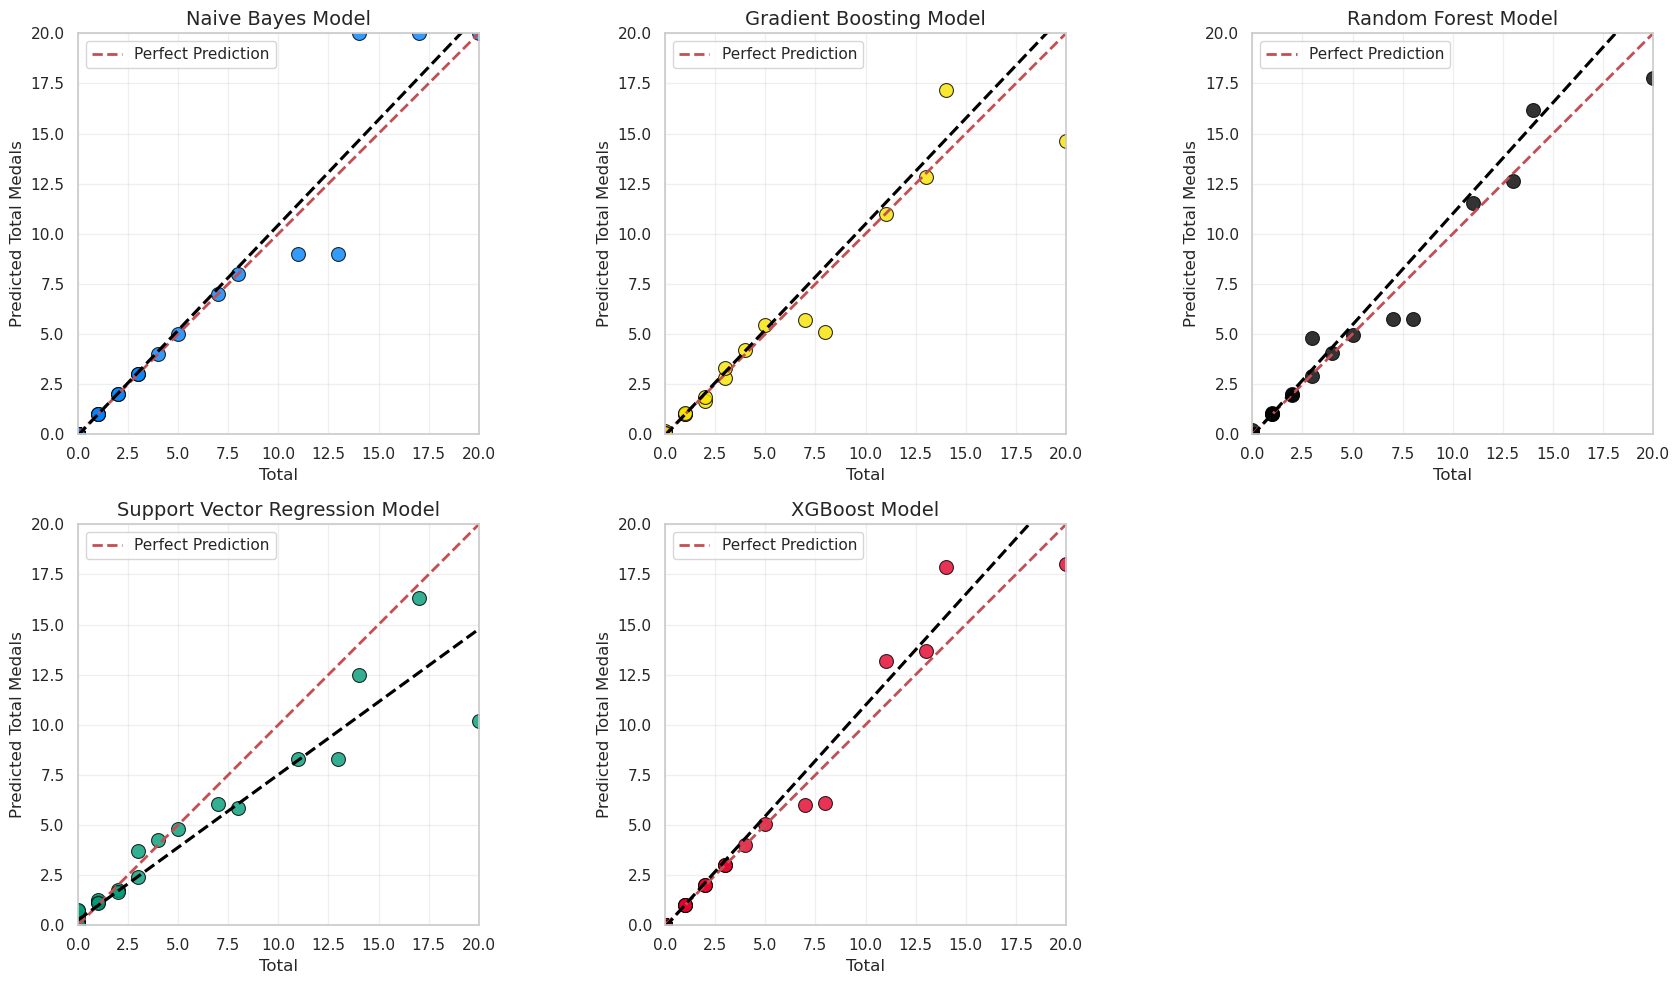

In [138]:
plt.figure(figsize=(18, 10))  

olympic_colors = {
    'Naive Bayes': '#0082FC',  # Blue
    'Gradient Boosting': '#F7E300',  # Yellow
    'Random Forest': '#000000',  # Black
    'Support Vector Regression': '#009B77',  # Green
    'XGBoost': '#E4002B'  # Red
}

marker = 'o'

plt.rcParams.update({'axes.grid': True, 'grid.alpha': 0.3, 'legend.frameon': True, 'legend.loc': 'best'})

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, color=olympic_colors[name], marker=marker, alpha=0.8, edgecolor='black', s=100)
    plt.title(f'{name} Model', fontsize=14)
    plt.xlabel('Actual Total Medals', fontsize=12)
    plt.ylabel('Predicted Total Medals', fontsize=12)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')  
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())
    plt.gca().set_aspect('equal', adjustable='box')  

    sns.regplot(x=y_test, y=y_pred, scatter=False, color='black', line_kws={'linestyle':'--'}, ci=None)
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## Why the XGBoost Model is the Best Performing Model

Based on the visualizations provided, the XGBoost Model appears to be the best performing model. Here's why:

### Closest Fit to Perfect Prediction
The XGBoost model's predictions (represented by the red dots) align most closely with the perfect prediction line (the red dashed line). This indicates that its predictions are very close to the actual values across the entire range of the data.

### Consistent Performance
The XGBoost model maintains its accuracy consistently across all data points, from lower to higher values. This suggests good generalization ability.

### Minimal Scatter
The points for the XGBoost model show the least scatter around the prediction line, indicating lower prediction error compared to the other models.

### Balanced Performance
Unlike some other models (e.g., Support Vector Regression) which show bias or inconsistency in certain ranges, the XGBoost model performs well across the entire range.
